In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from dataLoader import *

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None) 
pd.set_option('display.max_rows', 21)  

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.precision', 3)

# Read the Data

In [2]:
results_df_user = pd.DataFrame()
X_train, X_test, y_train, y_test = get_user_test_traingi_set(0.20)

# Scaling features

In [3]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simple Cross-Validation

Accuracy:  0.8429577464788732


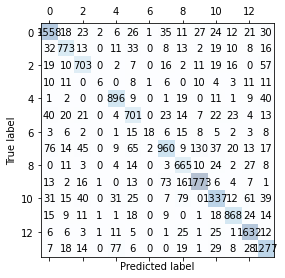

In [4]:
# Define your KNN classifier
knc = KNeighborsClassifier()

# Fit the classifier to the training data
knc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knc.predict(X_test)

# Print the accuracy score
print("Accuracy: ", knc.score(X_test, y_test))

# Create the confusion matrix
confmat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Evaluating the effect of K using 10-fold cross-validation

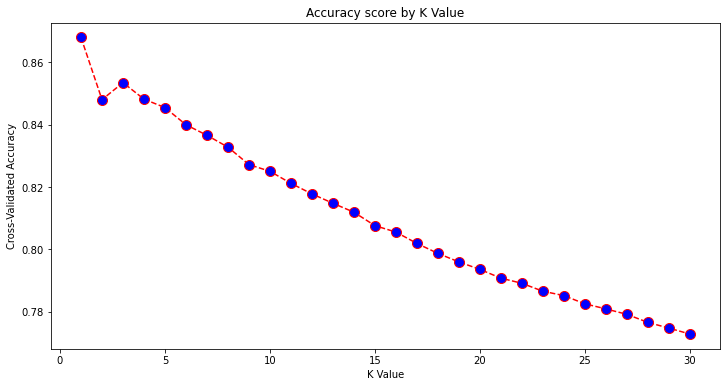

In [5]:
# Define the range of k
k_range = range(1, 31)

# List to hold the average accuracy for each value of k
cross_val_scores = []

# Perform 10-fold cross validation for each value of k
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
    cross_val_scores.append(scores.mean())

# Plot the accuracy for different values of k
plt.figure(figsize=(12, 6))  
plt.plot(k_range, cross_val_scores, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-Validated Accuracy') 
plt.show()

# Different Distance Metrics

In [ ]:
# List to hold the average accuracy for each type of metric
euclidean_scores = []
manhattan_scores = []

# Perform 10-fold cross validation for each type of metric
for i in k_range:
    knn_euclidean = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn_manhattan = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    
    scores_euclidean = cross_val_score(knn_euclidean, X_train, y_train, cv=10)
    scores_manhattan = cross_val_score(knn_manhattan, X_train, y_train, cv=10)
    
    euclidean_scores.append(scores_euclidean.mean())
    manhattan_scores.append(scores_manhattan.mean())

# Plot the accuracy for different metrics
plt.figure(figsize=(12, 6))  
plt.plot(k_range, euclidean_scores, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10, label='Euclidean')
plt.plot(k_range, manhattan_scores, color='green', linestyle='dashed', marker='o', 
         markerfacecolor='yellow', markersize=10, label='Manhattan')
plt.title('Accuracy score by K Value for Different Metrics')  
plt.xlabel('K Value')  
plt.ylabel('Cross-Validated Accuracy') 
plt.legend()
plt.show()

# Different Weighting Functions

In [ ]:
# List to hold the average accuracy for each type of weight
uniform_scores = []
distance_scores = []

# Perform 10-fold cross validation for each type of weight
for i in k_range:
    knn_uniform = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn_distance = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    scores_uniform = cross_val_score(knn_uniform, X_train, y_train, cv=10)
    scores_distance = cross_val_score(knn_distance, X_train, y_train, cv=10)
    
    uniform_scores.append(scores_uniform.mean())
    distance_scores.append(scores_distance.mean())

# Plot the accuracy for different weights
plt.figure(figsize=(12, 6))  
plt.plot(k_range, uniform_scores, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10, label='Uniform')
plt.plot(k_range, distance_scores, color='green', linestyle='dashed', marker='o', 
         markerfacecolor='yellow', markersize=10, label='Distance')
plt.title('Accuracy score by K Value for Different Weights')  
plt.xlabel('K Value')  
plt.ylabel('Cross-Validated Accuracy') 
plt.legend()
plt.show()


# Finding the best K using grid search

In [5]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan']

# Specify "parameter grid"
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)

# Specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)

# Since both parameters are discrete, so param_dist is the same as param_grid

# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
grid.cv_results_

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


KeyboardInterrupt: 

# Assessing the performance of the tuned KNN classifier

In [ ]:
# Instantiate KNN with best parameters
knn_best = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'], 
                                metric=knn_gscv.best_params_['metric'], 
                                weights=knn_gscv.best_params_['weights'])

# Fit the model
knn_best.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = knn_best.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))
